In [ ]:
%matplotlib inline
import brambox.boxes as bbb
import matplotlib.pyplot as plt

In [ ]:
annotations = bbb.parse('anno_darknet', 'inria/Test/pos/yolo-labels/', class_label_map={0: 'person'}, image_width=1., image_height=1.)
annotations = bbb.parse('anno_darknet', 'testing/clean/yolo-labels/', class_label_map={0: 'person'}, image_width=1., image_height=1.)
patch_simen = bbb.parse('det_coco', 'patch_simen.json', class_label_map={0: 'person'})
patch_up = bbb.parse('det_coco', 'patch_up.json', class_label_map={0: 'person'})
clean_results = bbb.parse('det_coco', 'clean_results.json', class_label_map={0: 'person'})
noise_results = bbb.parse('det_coco', 'noise_results.json', class_label_map={0: 'person'})
class_results = bbb.parse('det_coco', 'class_shift.json', class_label_map={0: 'person'})
class_only = bbb.parse('det_coco', 'class_only.json', class_label_map={0: 'person'})

In [ ]:
plt.figure()
teddy = bbb.pr(patch_simen, annotations)['person']
up = bbb.pr(patch_up, annotations)['person']
noise = bbb.pr(noise_results, annotations)['person']
clean = bbb.pr(clean_results, annotations)['person']
class_shift = bbb.pr(class_results, annotations)['person']
class_only_pr = bbb.pr(class_only, annotations)['person']



#ap = bbb.ap(teddy[0], teddy[1])
#plt.plot(teddy[1], teddy[0], label=f'Teddy: mAP: {round(ap*100, 2)}%')

plt.plot([0, 1.05], [0, 1.05], '--', color='gray')

ap = bbb.ap(clean[0], clean[1])
plt.plot(clean[1], clean[0], label=f'CLEAN: AP: {round(ap*100, 2)}%')

ap = bbb.ap(noise[0], noise[1])
plt.plot(noise[1], noise[0], label=f'NOISE: AP: {round(ap*100, 2)}%')

ap = bbb.ap(class_shift[0], class_shift[1])
plt.plot(class_shift[1], class_shift[0], label=f'OBJ-CLS: AP: {round(ap*100, 2)}%')

ap = bbb.ap(up[0], up[1])
plt.plot(up[1], up[0], label=f'OBJ: AP: {round(ap*100, 2)}%')

ap = bbb.ap(class_only_pr[0], class_only_pr[1])
plt.plot(class_only_pr[1], class_only_pr[0], label=f'CLS: AP: {round(ap*100, 2)}%')

#plt.gcf().suptitle('PR-curve')
plt.gca().set_ylabel('Precision')
plt.gca().set_xlabel('Recall')
plt.gca().set_xlim([0, 1.05])
plt.gca().set_ylim([0, 1.05])
plt.gca().legend(loc=4)
plt.savefig('pr-curve.eps')
plt.show()

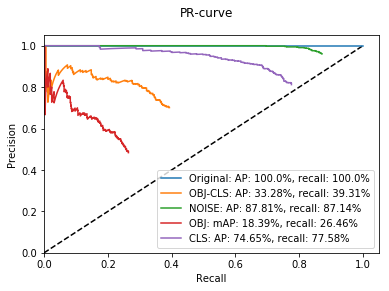

In [22]:
def thresh_dets(dets, thresh):
    thresholded = {}
    for name in dets:
        thresholded[name] = [d for d in dets[name] if d.confidence > 0.4]
        
    return thresholded

thresh = 0.5
    
teddy_t = bbb.pr(thresh_dets(patch_simen, thresh), annotations)['person']
up_t = bbb.pr(thresh_dets(patch_up, thresh), annotations)['person']
noise_t = bbb.pr(thresh_dets(noise_results, thresh), annotations)['person']
clean_t = bbb.pr(thresh_dets(clean_results, thresh), annotations)['person']
class_shift_t = bbb.pr(thresh_dets(class_results, thresh), annotations)['person']
class_only_t = bbb.pr(thresh_dets(class_only, thresh), annotations)['person']

plt.figure()

plt.plot([0, 1], [0, 1], 'k--')

ap = bbb.ap(clean_t[0], clean_t[1])
plt.plot(clean_t[1], clean_t[0], label=f'Original: AP: {round(ap*100, 2)}%, recall: {round(clean_t[1][-1]*100, 2)}%')

ap = bbb.ap(class_shift_t[0], class_shift_t[1])
plt.plot(class_shift_t[1], class_shift_t[0], label=f'OBJ-CLS: AP: {round(ap*100, 2)}%, recall: {round(class_shift_t[1][-1]*100, 2)}%')

ap = bbb.ap(noise_t[0], noise_t[1])
plt.plot(noise_t[1], noise_t[0], label=f'NOISE: AP: {round(ap*100, 2)}%, recall: {round(noise_t[1][-1]*100, 2)}%')
         
ap = bbb.ap(up_t[0], up_t[1])
plt.plot(up_t[1], up_t[0], label=f'OBJ: mAP: {round(ap*100, 2)}%, recall: {round(up_t[1][-1]*100, 2)}%')

ap = bbb.ap(class_only_t[0], class_only_t[1])
plt.plot(class_only_t[1], class_only_t[0], label=f'CLS: AP: {round(ap*100, 2)}%, recall: {round(class_only_t[1][-1]*100, 2)}%')

plt.gcf().suptitle('PR-curve')
plt.gca().set_ylabel('Precision')
plt.gca().set_xlabel('Recall')
plt.gca().set_xlim([0, 1.05])
plt.gca().set_ylim([0, 1.05])
plt.gca().legend(loc=4)
plt.show()

In [ ]:
def thresh_dets(dets, thresh):
    thresholded = {}
    for name in dets:
        thresholded[name] = [d for d in dets[name] if d.confidence > 0.4]
        
    return thresholded

thresh = 0.5
    
teddy_t = bbb.pr(thresh_dets(patch_simen, thresh), annotations)['person']
up_t = bbb.pr(thresh_dets(patch_up, thresh), annotations)['person']
noise_t = bbb.pr(thresh_dets(noise_results, thresh), annotations)['person']
clean_t = bbb.pr(thresh_dets(clean_results, thresh), annotations)['person']
class_shift_t = bbb.pr(thresh_dets(class_results, thresh), annotations)['person']
class_only_t = bbb.pr(thresh_dets(class_only, thresh), annotations)['person']

plt.figure()

plt.plot([0, 1], [0, 1], 'k--')

ap = bbb.ap(clean_t[0], clean_t[1])
plt.plot(clean_t[1], clean_t[0], label=f'Original: AP: {round(ap*100, 2)}%, recall: {round(clean_t[1][-1]*100, 2)}%')

ap = bbb.ap(class_shift_t[0], class_shift_t[1])
plt.plot(class_shift_t[1], class_shift_t[0], label=f'OBJ-CLS: AP: {round(ap*100, 2)}%, recall: {round(class_shift_t[1][-1]*100, 2)}%')

ap = bbb.ap(noise_t[0], noise_t[1])
plt.plot(noise_t[1], noise_t[0], label=f'NOISE: AP: {round(ap*100, 2)}%, recall: {round(noise_t[1][-1]*100, 2)}%')
         
ap = bbb.ap(up_t[0], up_t[1])
plt.plot(up_t[1], up_t[0], label=f'OBJ: mAP: {round(ap*100, 2)}%, recall: {round(up_t[1][-1]*100, 2)}%')

ap = bbb.ap(class_only_t[0], class_only_t[1])
plt.plot(class_only_t[1], class_only_t[0], label=f'CLS: AP: {round(ap*100, 2)}%, recall: {round(class_only_t[1][-1]*100, 2)}%')

plt.gcf().suptitle('PR-curve')
plt.gca().set_ylabel('Precision')
plt.gca().set_xlabel('Recall')
plt.gca().set_xlim([0, 1.05])
plt.gca().set_ylim([0, 1.05])
plt.gca().legend(loc=4)
plt.show()